# Autoencoder

## What are you going to learn
+ What is Autoencoder
+ Autoencoder application
+ example code

## What is Autoencoder?

+ ***Unsupervised Learning*** is applied on X without y: data without labels. A typical use case is to find hidden structure in the data.
+ An autoencoder is a neural network that is trained to attempt to copy its input to its output.
+ The network consists of two parts: an ***encoder*** and a ***decoder*** that produce a reconstruction

### encoder & decoder
+ Encoder function: $z = f(x)$
+ Decoder function: $x = g(z)$
+ We learn to set  $g(f(x))=x$

## Autoencoder with Scikit-learn

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score

### Load MNIST Data
+ Use (1, 5, 6) digits to visualize latent space in 2-D
+ The data are 28*28 images

In [23]:
# PyTorch 사용 예시 (데이터 로딩 및 전처리 부분만)
import torchvision
import torchvision.transforms as transforms

# MNIST 데이터셋 로드 및 다운로드
transform = transforms.Compose([
    transforms.ToTensor(), # PIL Image를 Tensor로 변환하고 0-1로 스케일링
    transforms.Lambda(lambda x: x.view(-1)) # 이미지를 flatten (784,)
])

train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transform,
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transform,
                                          download=True)

# NumPy 배열로 변환 (필요한 경우)
train_x = np.array([data.numpy() for data, label in train_dataset])
train_y = np.array([label for data, label in train_dataset])

test_x = np.array([data.numpy() for data, label in test_dataset])
test_y = np.array([label for data, label in test_dataset])

# 이후 n_train, n_test, print 문 등은 TensorFlow 예시와 유사하게 진행

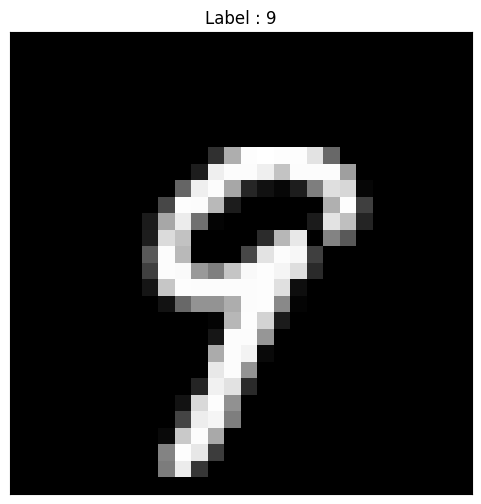

In [24]:
idx = np.random.randint(train_x.shape[0])
img = train_x[idx].reshape(28,28)

plt.figure(figsize = (6,6))
plt.imshow(img,'gray')
plt.title("Label : {}".format(train_y[idx])) # 수정된 코드 (정수 레이블 직접 사용)
plt.xticks([])
plt.yticks([])
plt.show()

### Define the Structure of an Autoencoder
+ Input shape
+ Latent variable shape
+ Encoder shape
+ Decoder shape

In [25]:
n_input = 28*28

# Encoder structure
n_encoder1 = 500
n_encoder2 = 300

n_latent = 2

# Decoder structure
n_decoder2 = 300
n_decoder1 = 500

### Build a model
+ Both for Encoder and Decoder, use ***tanh*** as a nonlinear activation function
+ optimizer -> Adam

In [26]:
reg = MLPRegressor(hidden_layer_sizes = (n_encoder1, n_encoder2, n_latent, n_decoder2, n_decoder1),
                   activation = 'tanh',
                   solver = 'adam',
                   learning_rate_init = 0.0001,
                   max_iter = 50,
                   tol = 0.0000001,
                   verbose = True)

In [27]:
reg.fit(train_x, train_x)

Iteration 1, loss = 0.03294897
Iteration 2, loss = 0.02890797
Iteration 3, loss = 0.02862982
Iteration 4, loss = 0.02852374
Iteration 5, loss = 0.02850081
Iteration 6, loss = 0.02848364
Iteration 7, loss = 0.02842818
Iteration 8, loss = 0.02822515
Iteration 9, loss = 0.02783696
Iteration 10, loss = 0.02757065
Iteration 11, loss = 0.02733352
Iteration 12, loss = 0.02698798
Iteration 13, loss = 0.02651677
Iteration 14, loss = 0.02602532
Iteration 15, loss = 0.02558576
Iteration 16, loss = 0.02516621
Iteration 17, loss = 0.02476462
Iteration 18, loss = 0.02441980
Iteration 19, loss = 0.02415506
Iteration 20, loss = 0.02393279
Iteration 21, loss = 0.02374610
Iteration 22, loss = 0.02357538
Iteration 23, loss = 0.02342016
Iteration 24, loss = 0.02327957
Iteration 25, loss = 0.02314157
Iteration 26, loss = 0.02301309
Iteration 27, loss = 0.02288382
Iteration 28, loss = 0.02277809
Iteration 29, loss = 0.02266921
Iteration 30, loss = 0.02257040
Iteration 31, loss = 0.02247172
Iteration 32, los

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='tanh', hidden_layer_sizes=(500, 300, 2, 300, 500),
             learning_rate_init=0.0001, max_iter=50, tol=1e-07, verbose=True)

### test & evaluate

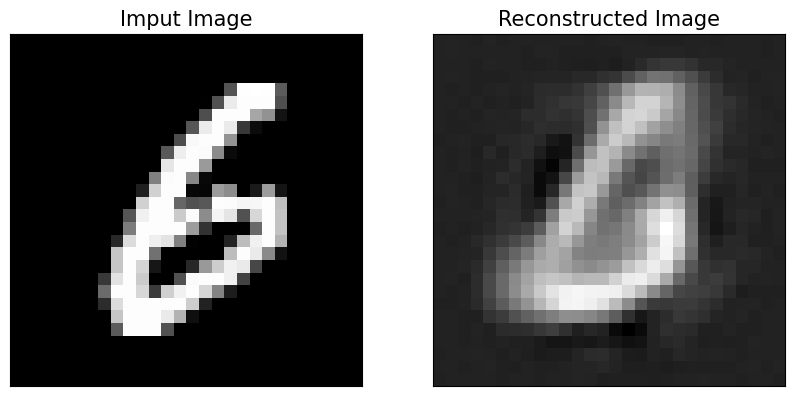

In [28]:
idx = np.random.randint(test_x.shape[0])
x_reconst = reg.predict(test_x[idx].reshape(-1,784))

plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
plt.imshow(test_x[idx].reshape(28,28), 'gray')
plt.title('Imput Image', fontsize = 15)
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(x_reconst.reshape(28,28), 'gray')
plt.title('Reconstructed Image', fontsize = 15)
plt.xticks([])
plt.yticks([])
plt.show()


+ To see the distribution of latent variables, we make a projection of 784-dimensional image space onto 2-dimensional latent space

In [29]:
def encoder(data):
    data = np.asmatrix(data)

    encoder1 = data*reg.coefs_[0] + reg.intercepts_[0]
    encoder1 = (np.exp(encoder1) - np.exp(-encoder1))/(np.exp(encoder1) + np.exp(-encoder1))

    encoder2 = encoder1*reg.coefs_[1] + reg.intercepts_[1]
    encoder2 = (np.exp(encoder2) - np.exp(-encoder2))/(np.exp(encoder2) + np.exp(-encoder2))

    latent = encoder2*reg.coefs_[2] + reg.intercepts_[2]
    latent = (np.exp(latent) - np.exp(-latent))/(np.exp(latent) + np.exp(-latent))

    return np.asarray(latent)

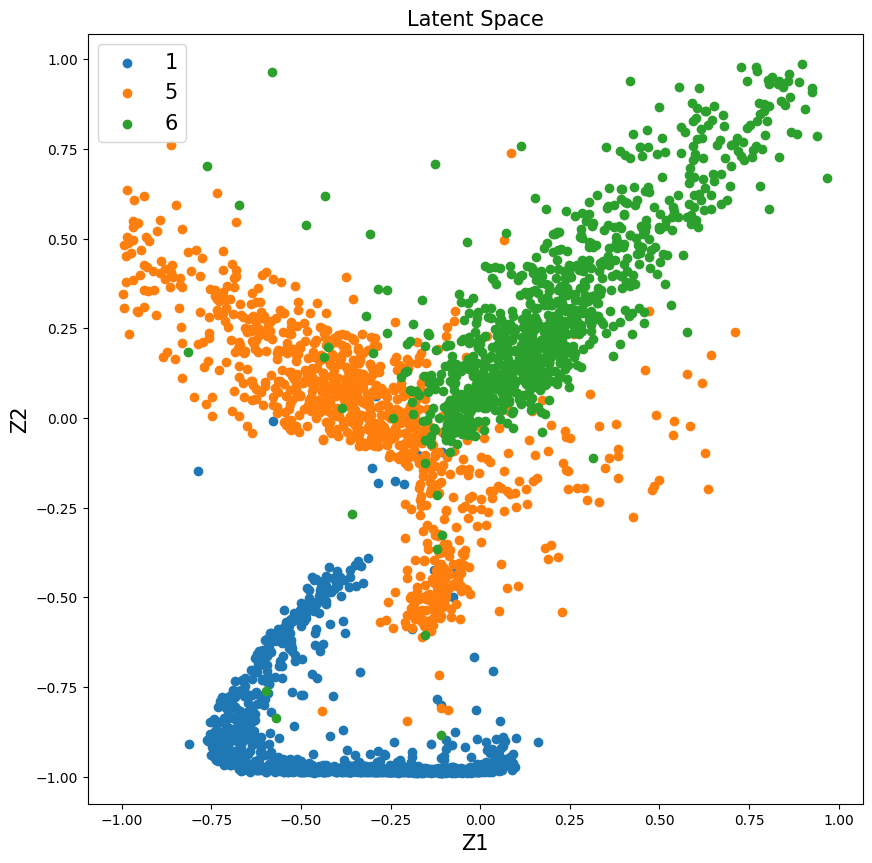

In [30]:
test_latent = encoder(test_x)

plt.figure(figsize = (10,10))
# test_y가 이미 1차원 정수 레이블 배열이라고 가정하고 수정합니다.
plt.scatter(test_latent[test_y == 1, 0], test_latent[test_y == 1, 1], label = '1')
plt.scatter(test_latent[test_y == 5, 0], test_latent[test_y == 5, 1], label = '5')
plt.scatter(test_latent[test_y == 6, 0], test_latent[test_y == 6, 1], label = '6')
plt.title('Latent Space', fontsize=15)
plt.xlabel('Z1', fontsize=15)
plt.ylabel('Z2', fontsize=15)
plt.legend(fontsize = 15)
plt.axis('equal')
plt.show()

In [31]:
def decoder(new_data):
    new_data = np.asmatrix(new_data)
    decoder2 = new_data*reg.coefs_[3] + reg.intercepts_[3]
    decoder2 = (np.exp(decoder2) - np.exp(-decoder2))/(np.exp(decoder2) + np.exp(-decoder2))

    decoder1 = decoder2*reg.coefs_[4] + reg.intercepts_[4]
    decoder1 = (np.exp(decoder1) - np.exp(-decoder1))/(np.exp(decoder1) + np.exp(-decoder1))

    reconst = decoder1*reg.coefs_[5] + reg.intercepts_[5]
    reconst = (np.exp(reconst) - np.exp(-reconst))/(np.exp(reconst) + np.exp(-reconst))

    return np.asarray(reconst)

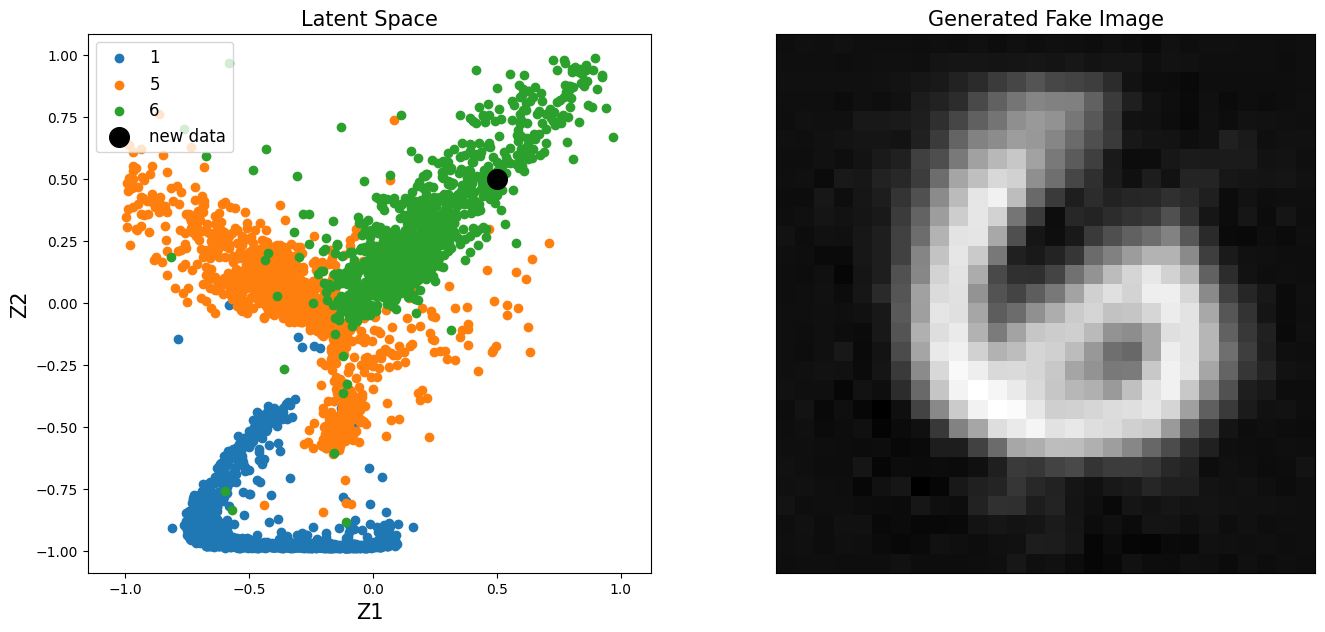

In [33]:
latent = np.array([[0.5, 0.5]])
reconst = decoder(latent)

plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.scatter(test_latent[test_y == 1, 0], test_latent[test_y == 1, 1], label = '1')
plt.scatter(test_latent[test_y == 5, 0], test_latent[test_y == 5, 1], label = '5')
plt.scatter(test_latent[test_y == 6, 0], test_latent[test_y == 6, 1], label = '6')
plt.scatter(latent[:,0], latent[:,1], c = 'k', marker = 'o', s = 200, label = 'new data')
plt.title('Latent Space', fontsize = 15)
plt.xlabel('Z1', fontsize = 15)
plt.ylabel('Z2', fontsize = 15)
plt.legend(loc = 2, fontsize = 12)
plt.axis('equal')
plt.subplot(1,2,2)
plt.imshow(reconst.reshape(28,28), 'gray')
plt.title('Generated Fake Image', fontsize = 15)
plt.xticks([])
plt.yticks([])
plt.show()

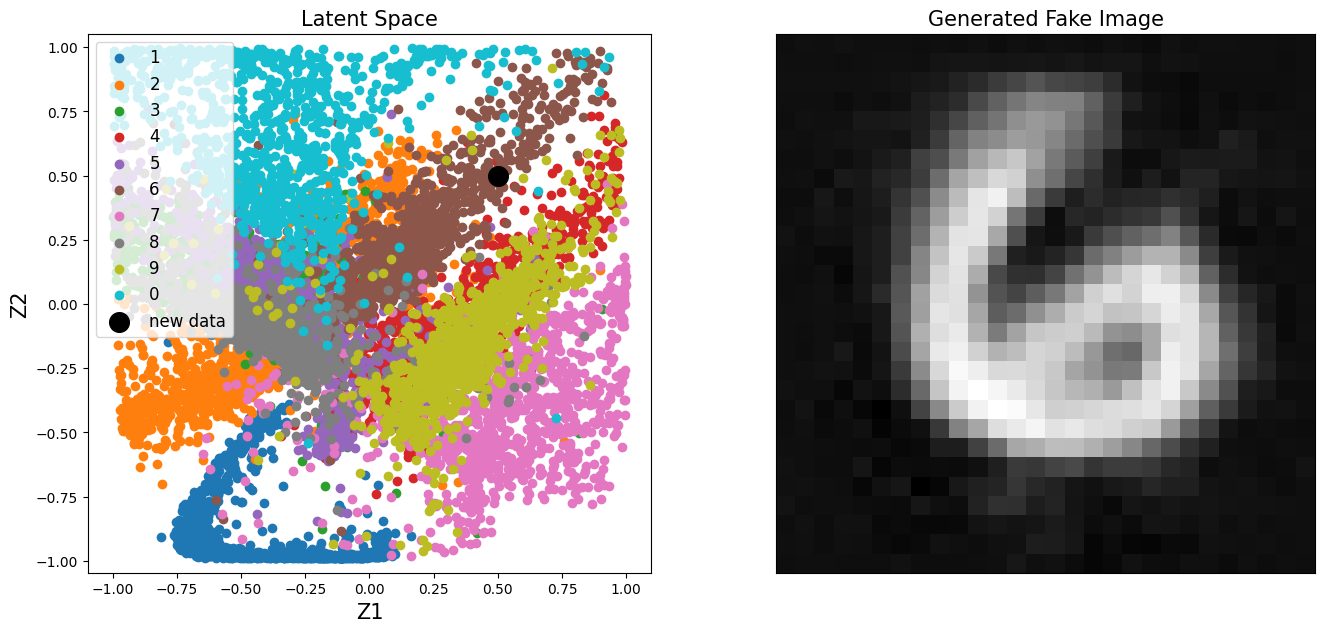

In [34]:
latent = np.array([[0.5, 0.5]])
reconst = decoder(latent)

plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.scatter(test_latent[test_y == 1, 0], test_latent[test_y == 1, 1], label = '1')
plt.scatter(test_latent[test_y == 2, 0], test_latent[test_y == 2, 1], label = '2')
plt.scatter(test_latent[test_y == 3, 0], test_latent[test_y == 3, 1], label = '3')
plt.scatter(test_latent[test_y == 4, 0], test_latent[test_y == 4, 1], label = '4')
plt.scatter(test_latent[test_y == 5, 0], test_latent[test_y == 5, 1], label = '5')
plt.scatter(test_latent[test_y == 6, 0], test_latent[test_y == 6, 1], label = '6')
plt.scatter(test_latent[test_y == 7, 0], test_latent[test_y == 7, 1], label = '7')
plt.scatter(test_latent[test_y == 8, 0], test_latent[test_y == 8, 1], label = '8')
plt.scatter(test_latent[test_y == 9, 0], test_latent[test_y == 9, 1], label = '9')
plt.scatter(test_latent[test_y == 0, 0], test_latent[test_y == 0, 1], label = '0')
plt.scatter(latent[:,0], latent[:,1], c = 'k', marker = 'o', s = 200, label = 'new data')
plt.title('Latent Space', fontsize = 15)
plt.xlabel('Z1', fontsize = 15)
plt.ylabel('Z2', fontsize = 15)
plt.legend(loc = 2, fontsize = 12)
plt.axis('equal')
plt.subplot(1,2,2)
plt.imshow(reconst.reshape(28,28), 'gray')
plt.title('Generated Fake Image', fontsize = 15)
plt.xticks([])
plt.yticks([])
plt.show()